# Model Evaluation

In [33]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import cv2 as cv
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

## LOAD VALIDATION (TEST) DATA

In [8]:
# Load picked data
df_test = pd.read_pickle("../pickled_data/df_val.pkl")
df_test

,image_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
...,...,...
395,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
396,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
398,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [9]:
# Flatten the image_data
df_test['image_data'] = df_test['image_data'].apply(lambda x: x.flatten())
df_test

,image_data,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
395,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
396,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
397,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
398,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


## LOAD MODELS

In [35]:
# Load SVM model variant (a)
svm_model_a = joblib.load("../exported_models/svm_model_(a).pkl")
svm_model_a

SVC(C=1, kernel='linear')

In [3]:
# Load SVM model variant (b)
svm_model_b = joblib.load("../exported_models/svm_model_(b).pkl")
svm_model_b

SVC(C=1)

In [38]:
# Load SVM model variant (c)
svm_model_c = joblib.load("../exported_models/svm_model_(c).pkl")
svm_model_c

SVC(C=1, kernel='poly')

## Evaluation of the models' performance on the validation data

In [6]:
# Import time module to measure the time taken to predict
import time

In [8]:
# Predict the test data (using the SVM model variant (a))
start_time = time.time()
y_predicted_a = svm_model_a.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_a = end_time - start_time
print(f"Time taken to predict: {time_taken_a} seconds")

Time taken to predict: 135.4493396282196 seconds


In [9]:
y_predicted_a

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# Predict the test data (using the SVM model variant (b))
start_time = time.time()
y_predicted_b = svm_model_b.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_b = end_time - start_time
print(f"Time taken to predict: {time_taken_b} seconds")

Time taken to predict: 1536.6182684898376 seconds


In [17]:
y_predicted_b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# Predict the test data (using the SVM model variant (c))
start_time = time.time()
y_predicted_c = svm_model_c.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_c = end_time - start_time
print(f"Time taken to predict: {time_taken_c} seconds")

Time taken to predict: 227.39304304122925 seconds


In [13]:
y_predicted_c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [12]:
y_actual = df_test['label'].tolist()
y_actual

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### AUCROC

Model A

In [41]:
# Probability estimates of the positive class (using the SVM model variant (a))
y_prob_a = svm_model_a.decision_function(df_test['image_data'].tolist())
y_prob_a

array([ 0.29997526,  0.37055329, -0.02641636,  0.64657689,  0.17315332,
        0.6169223 ,  0.5672561 ,  0.34297555,  0.1882222 ,  0.20950487,
        0.1190662 ,  0.28877962,  0.21103962, -0.0269163 ,  0.1882222 ,
        0.28877962, -0.15468471,  0.27372359,  0.27372359,  0.22787004,
        0.35091423,  0.19230312,  0.7320291 ,  0.24623207,  0.1619917 ,
        0.24623207,  0.50160883,  0.59835161,  0.65347134,  0.36360793,
        0.33314667,  0.03653021,  0.2278481 ,  0.27774634,  0.13193559,
        0.47080373,  0.13585883, -0.1029368 ,  0.27304538,  0.19692855,
        0.07802955,  0.22689841,  0.12749319,  0.19692855,  0.51328102,
        0.15298416,  0.59798679,  0.54575078,  0.19593192,  0.66424302,
        0.46170462,  0.73295369,  0.41628075,  0.17343908, -0.00984925,
       -0.15588587, -0.25431462,  0.1619917 ,  0.46222887, -0.0989252 ,
       -0.23634187,  0.23539646, -0.00984925, -0.23634187, -0.04330633,
        0.0733953 , -0.22335741,  0.57834964,  0.38862226,  0.65

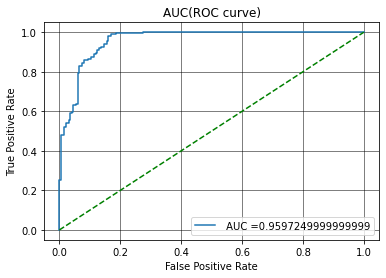

In [42]:
# Compute the ROC curve
test_fpr, test_tpr, thresholds = roc_curve(y_actual, y_prob_a)

# Plot the curve
plt.grid()
plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Model B

In [ ]:
# Probability estimates of the positive class (using the SVM model variant (b))
y_prob_b = svm_model_b.decision_function(df_test['image_data'].tolist())
y_prob_b

In [31]:
# AUC Score (using the SVM model variant (b))
roc_auc_score(y_actual, y_prob_b)

0.997825

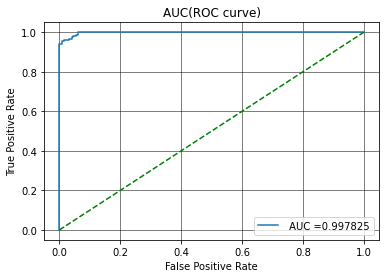

In [29]:
# Compute the ROC curve
test_fpr, test_tpr, thresholds = roc_curve(y_actual, y_prob_b)

# Plot the curve
plt.grid()
plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Model C

In [39]:
# Probability estimates of the positive class (using the SVM model variant (c))
y_prob_c = svm_model_c.decision_function(df_test['image_data'].tolist())
y_prob_c

array([ 0.23494233,  0.24288019,  0.22282728,  0.32278764,  0.29247669,
        0.33360464,  0.34166399,  0.34413013,  0.21018958,  0.24627545,
        0.2460327 ,  0.29030591,  0.22747778,  0.22707173,  0.21018958,
        0.29030591,  0.27036296,  0.24969134,  0.24969134,  0.25010756,
        0.2527066 ,  0.294183  ,  0.35243561,  0.33350331,  0.31285914,
        0.33350331,  0.30340729,  0.32419183,  0.27851289,  0.32990488,
        0.34852046,  0.24470909,  0.25097581,  0.25652042,  0.28517758,
        0.33448378,  0.28452726,  0.27013952,  0.27572214,  0.33235773,
        0.25493691,  0.25257104,  0.22847391,  0.33235773,  0.33472538,
        0.28701981,  0.33495801,  0.27282191,  0.32070397,  0.32942639,
        0.30965581,  0.28083081,  0.33470583,  0.33609476,  0.26860537,
        0.23449545,  0.18295999,  0.31285914,  0.29241036,  0.24952164,
        0.23780304,  0.25360081,  0.26860537,  0.23780304,  0.24599284,
        0.24853955,  0.23700165,  0.33651275,  0.29446316,  0.33

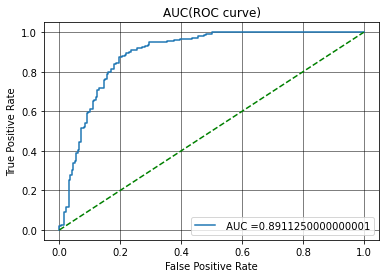

In [40]:
# Compute the ROC curve
test_fpr, test_tpr, thresholds = roc_curve(y_actual, y_prob_c)

# Plot the curve
plt.grid()
plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()